# Analysis of First Year Semester-1 Result

The data used in this analysis is extracted from the Institute website. The data can be used to show various patterns in the results in relation to Section, Gender, Branch and other factors.

## Importing the libraries 

In [1]:
#Importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Importing the dataset

In [2]:
#Importing the dataset
dataset = pd.read_csv("/kaggle/input/manit-201923-batch-sem1-result/first_year.csv")
dataset

,Sno,Section,Scholar No,Branch,Name,Gender,Result,GPA
0,1,A,191111002,Civil,SATYAM KUMAR,M,Pass,7.74
1,2,A,191111009,Civil,RAVIRAJ SINGH,M,Pass,7.20
2,3,A,191111020,Civil,SUMIT RATHORE,M,Pass,8.23
3,4,A,191111030,Civil,SAHIL GUPTA,M,Pass,7.44
4,5,A,191111040,Civil,ABHAY SHARMA,M,Pass,7.51
...,...,...,...,...,...,...,...,...
949,950,J,191119038,MSME,ADITYA DHAKAD,M,Pass,8.04
950,951,J,191119065,MSME,IMRAH RAVISH ZAMIR,F,Pass,8.83
951,952,J,191119072,MSME,MRAITUNJAYA TRIVEDI,M,Pass,6.67
952,953,J,191119077,MSME,RAHUL MEENA,M,Pass,6.59


### The Dataset contains entries of 954 students across the following parameters:
* Section
* Branch
* Name
* Gender
* Result
* GPA

## Removing Students who did not appear for exam

In [3]:
#Removing Students with 0 GPA who didn't appear for exam
students_absent = dataset[dataset.GPA == 0]
dataset = dataset[dataset.GPA != 0]
students_absent.head()

,Sno,Section,Scholar No,Branch,Name,Gender,Result,GPA
131,132,B,191113036,EE,RAMNARESH MEENA,M,Not Clear,0.0
380,381,D,191117031,CHEM,MANISHA DHARMNATH SHARMA,F,Not Clear,0.0
436,437,E,191114217,ECE,ADITYA SINGH BISHT,M,Not Clear,0.0
439,440,E,191114265,ECE,GANTUKA VIGNESH,M,Not Clear,0.0
448,449,E,191116205,MECH,SAMEER MANSOORI,M,Not Clear,0.0


# Plotting Section wise students who didn't appear for exams

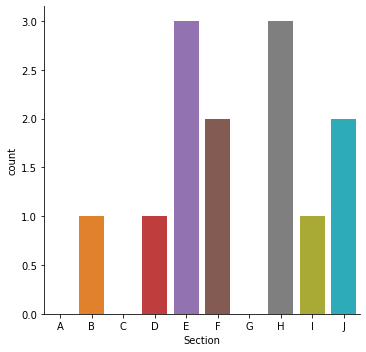

In [4]:
# Plotting Section wise students who didn't appear for exams
sns.catplot(x="Section", data=students_absent, kind='count', order='ABCDEFGHIJ')

# Students who did not clear the Semester

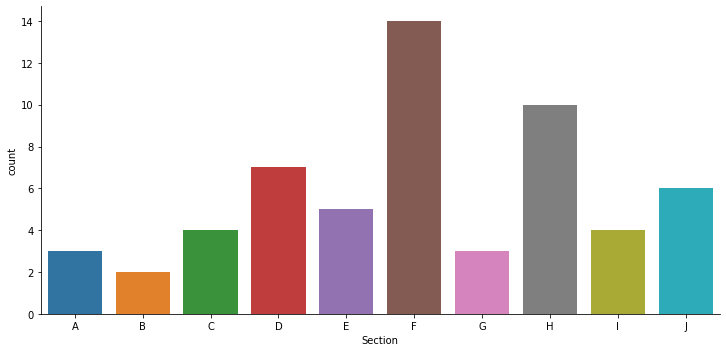

In [5]:
#Students who did not clear the semester
not_clear = dataset[dataset.Result == 'Not Clear']
sns.catplot(x = "Section", data=not_clear, kind='count', aspect=2, order="ABCDEFGHIJ")

# Total student strength sectionwise

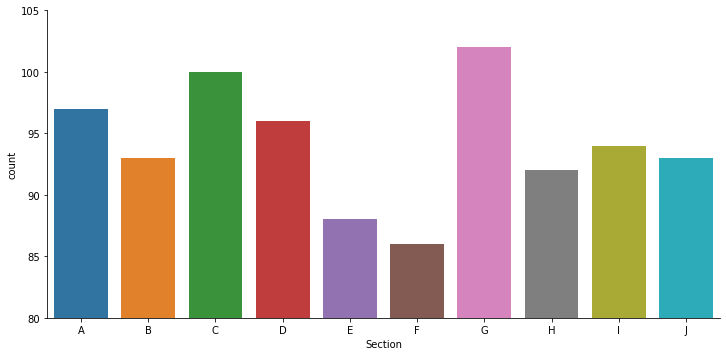

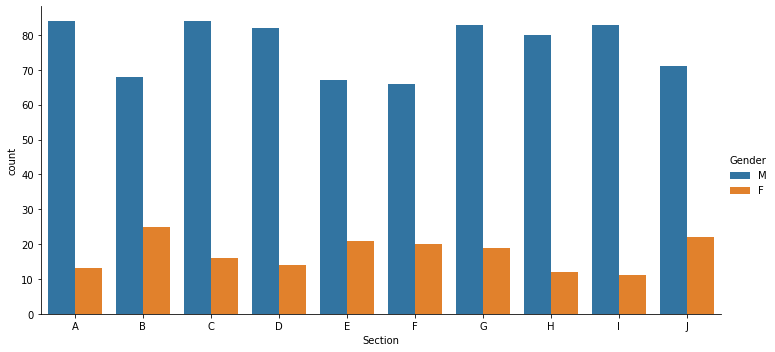

In [6]:
#Total student strength sectionwise
sec_plt = sns.catplot(x='Section', data=dataset, aspect=2, kind='count', order="ABCDEFGHIJ")
sec_plt.set(ylim=(80, 105))
sns.catplot(x='Section', data=dataset, aspect=2, kind='count', hue='Gender', order="ABCDEFGHIJ")

# Branchwise Strength in different sections

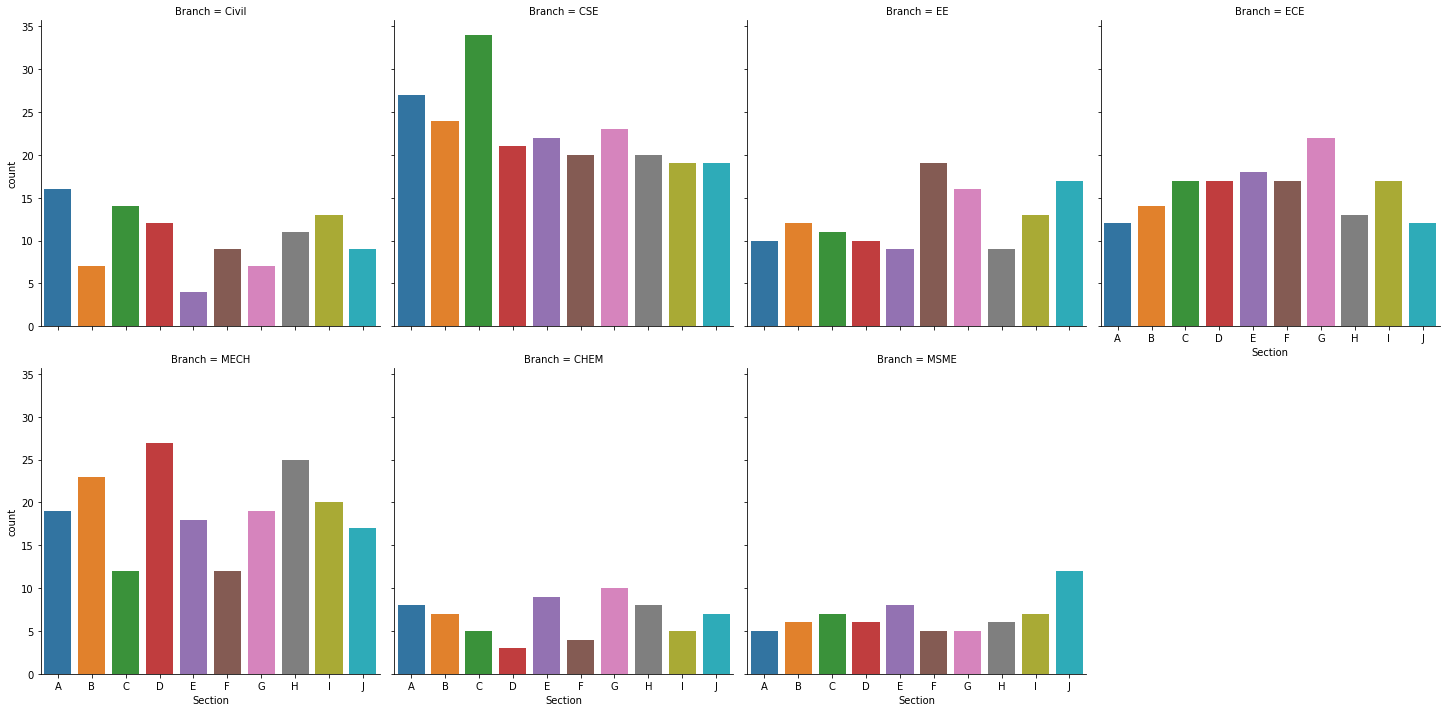

In [7]:
#Branchwise Strength in different sections
sns.catplot(x='Section', data=dataset, kind='count', col='Branch', col_wrap=4, order="ABCDEFGHIJ")

# Kernel Density Extimates for GPA

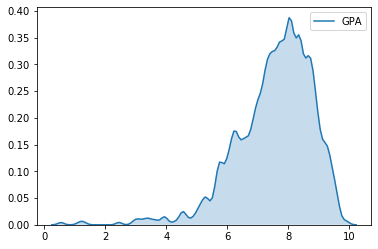

In [8]:
#Kernel Density Extimate for GPA
sns.kdeplot(data=dataset['GPA'], bw=0.1, shade=True)

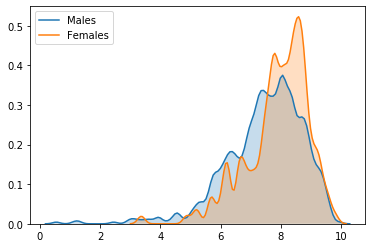

In [9]:
#Kernel Density Extimate Gender wise
m_gpa = dataset[dataset.Gender=='M']
f_gpa = dataset[dataset.Gender=='F']
sns.kdeplot(m_gpa['GPA'], bw=0.12, shade = True, label='Males')
sns.kdeplot(f_gpa['GPA'], bw=0.12, shade = True, label='Females')

# GPA across all Sections

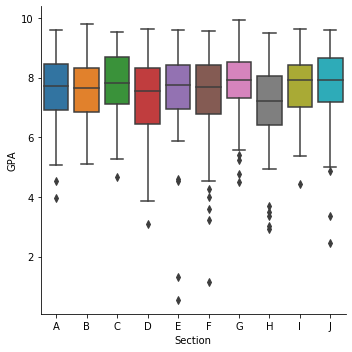

In [10]:
#Section wise GPA
sns.catplot(x='Section', y='GPA', data=dataset, kind='box')

# Sectionwise GPA by Gender

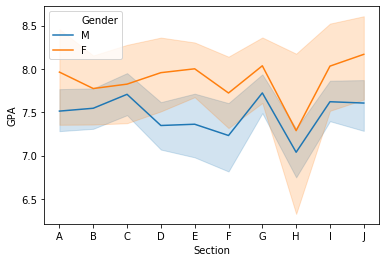

In [11]:
#Sectionwise GPA by Gender
sns.lineplot(x='Section', y='GPA', hue='Gender', data=dataset)

# GPA Across all Branches

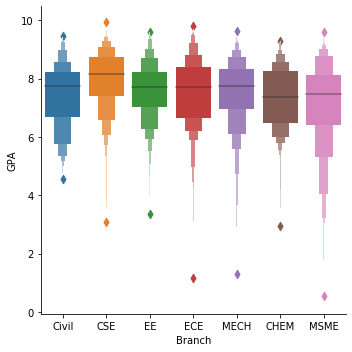

In [12]:
#Branchwise GPA
sns.catplot(x='Branch', y='GPA', data=dataset, kind='boxen')

# Branchwise GPA for Males and Females

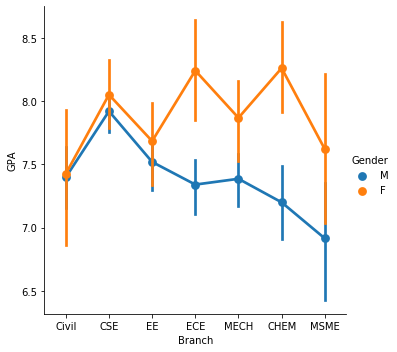

In [13]:
#Branchwise GPA for Males and Females
sns.catplot(x='Branch', y='GPA', data=dataset, kind='point', hue='Gender')

# Branchwise GPA across all sections

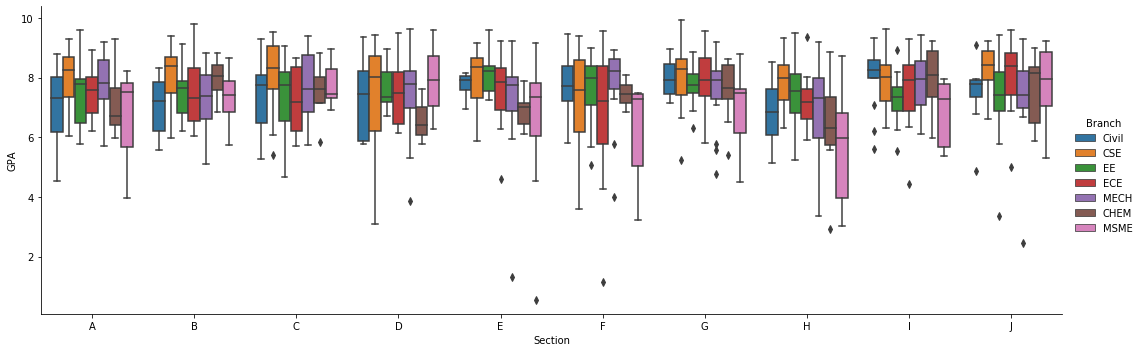

In [14]:
#Branchwise GPA across all sections
sns.catplot(x='Section', y='GPA', data=dataset, hue='Branch', kind='box', aspect=3)

## Adding new Feature: Second year section

In [15]:
#Adding new feature: second year section
pd.set_option('mode.chained_assignment', None)
x = dataset['Scholar No'].copy() % 1000
sec=[]
for temp in x:
    if temp // 200 == 0:
        sec.append(1)
    elif temp // 200 == 1:
        sec.append(2)
    else:
        sec.append(3)
dataset['Section-Sem3'] = sec

# Plotting Second year section wise GPA

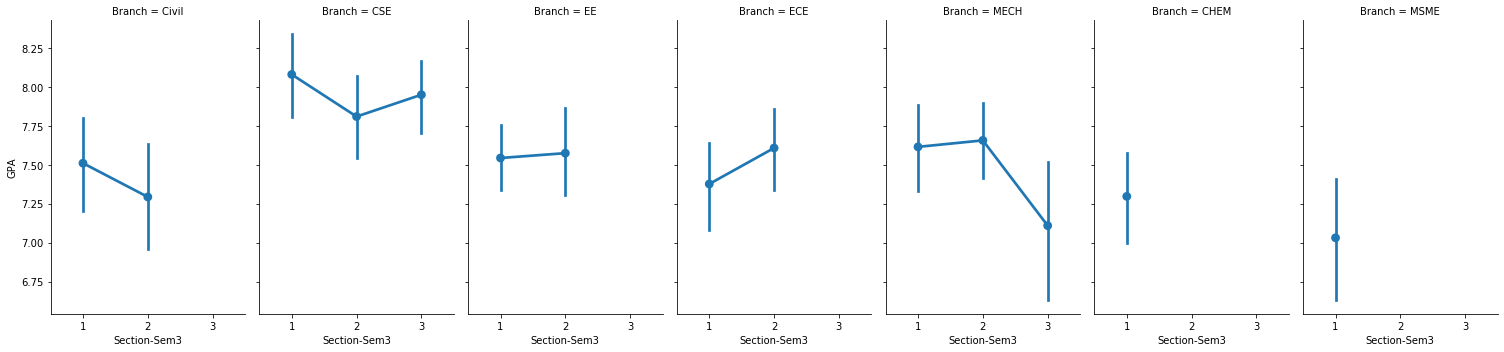

In [16]:
#Plotting Second year section wise GPA
sns.catplot(x='Section-Sem3', y='GPA', col='Branch', data=dataset, kind='point', aspect=0.6, col_wrap=7)

## Extracting initials

In [17]:
#Extracting initials
x = dataset.Name
d=[]
for i in dataset.Name:
    d.append(i[0])
dataset['Initials']=d

# Plotting count of students with same initials

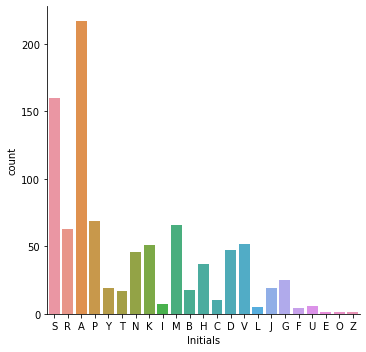

In [18]:
#Plotting count of students with same initials
sns.catplot(x='Initials', kind='count', data=dataset)